In [1]:
import Norbit
from Norbit.body import Body
from Norbit.hamiltonian import *
from Norbit.integrators import RungeKutta_4
from Norbit.simulation import OrbitSimulation
from examples.initial_conditions_outer_solar import *

In [2]:
# Initial condition setup
Sun = Body(mass=m_Sun,
           position = q0_Sun,
           velocity = v0_Sun,
           name='Sun')
Jupyter = Body(mass=m_Jupyter,
           position = q0_Jupyter,
           velocity = v0_Jupyter,
           name='Jupyter')
Saturn = Body(mass=m_Saturn,
           position = q0_Saturn,
           velocity = v0_Saturn,
           name='Saturn')
Uranus = Body(mass=m_Uranus,
           position = q0_Uranus,
           velocity = v0_Uranus,
           name='Uranus')
Neptune = Body(mass=m_Neptune,
           position = q0_Neptune,
           velocity = v0_Neptune,
           name='Neptune')
Pluto = Body(mass=m_Pluto,
           position = q0_Pluto,
           velocity = v0_Pluto,
           name='Pluto')
bodies = [Sun, Jupyter, Saturn, Uranus, Neptune, Pluto]

In [21]:
# Simulation setup and run
timestep = 10. # step size in Earth days
orbit_duration = 2.E5 # orbit duration in Earth days
simulation_lf1 = OrbitSimulation(bodies)
simulation_lf1.specify_Hamiltonian(dVdq)
simulation_lf1.run(orbit_duration,timestep)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [22]:
# Check for conservation of total momentum and total angular momentum
p = (mass[np.newaxis,:,np.newaxis]*simulation_lf1.v_history)
total_p = p.sum(axis=1)
delta_p = (total_p - total_p[0,:]) / total_p[0,:]
L = np.cross(simulation_lf1.q_history,p,axisa=-1,axisb=-1)
total_L = L.sum(axis=1)
delta_L = (total_L - total_L[0,:]) / total_L[0,:]

Text(0.5, 1.0, 'Relative error in total angular momentum during orbit simulation')

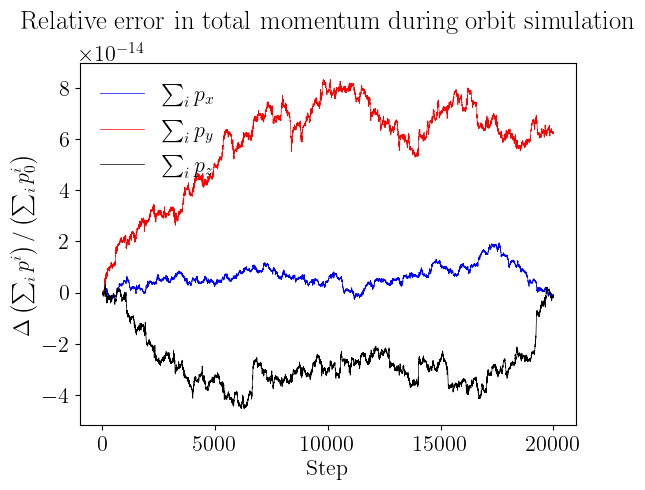

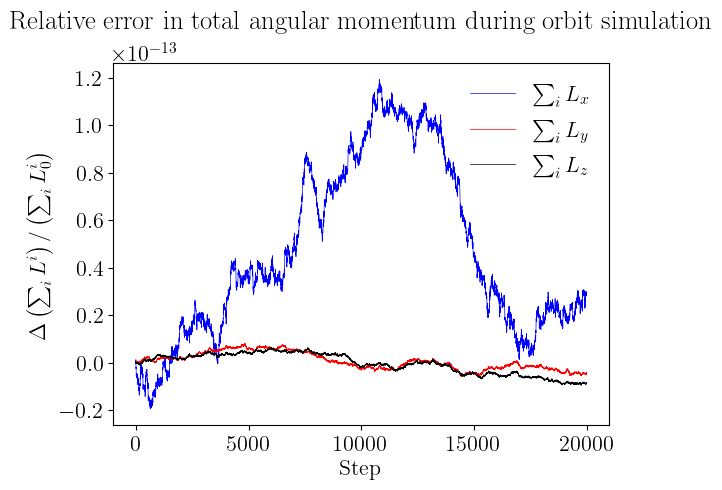

In [23]:
# Plot error in total momentum and angular momentum
import matplotlib
import matplotlib.pyplot as plt
FontSize=16
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size'   : FontSize})
matplotlib.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.rcParams["figure.dpi"] = 100
plt.rcParams['xtick.labelsize']=FontSize
plt.rcParams['ytick.labelsize']=FontSize
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['hatch.linewidth'] = 1.0
plt.rcParams['lines.linewidth'] = 1.0
fig, ax = plt.subplots(1,facecolor='white')
ax.plot(delta_p[:,0],lw=0.5,c='b',label=r'$\sum_i p_x$')
ax.plot(delta_p[:,1],lw=0.5,c='r',label=r'$\sum_i p_y$')
ax.plot(delta_p[:,2],lw=0.5,c='k',label=r'$\sum_i p_z$')
ax.legend(frameon=False,loc='best')
ax.set_xlabel(r'Step')
ax.set_ylabel(r'$\Delta \left(\sum_i p^i\right) / \left(\sum_i p^i_0\right)$')
ax.set_title(r"Relative error in total momentum during orbit simulation",pad=25)

fig, ax = plt.subplots(1,facecolor='white')
ax.plot(delta_L[:,0],lw=0.5,c='b',label=r'$\sum_i L_x$')
ax.plot(delta_L[:,1],lw=0.5,c='r',label=r'$\sum_i L_y$')
ax.plot(delta_L[:,2],lw=0.5,c='k',label=r'$\sum_i L_z$')
ax.legend(frameon=False,loc='best')
ax.set_xlabel(r'Step')
ax.set_ylabel(r'$\Delta \left(\sum_i L^i\right) / \left(\sum_i L^i_0\right)$')
ax.set_title(r"Relative error in total angular momentum during orbit simulation",pad=25)

In [24]:
# Plot orbits
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
for n in range(len(bodies)):
    ax.plot(simulation_lf1.q_history[:,n,0],simulation_lf1.q_history[:,n,1],simulation_lf1.q_history[:,n,2],lw=0.5,label=bodies[n].name)
ax.set_title(r'Orbits in Outer Solar System, simulated by KDK leapfrog, $h=10$ days, $T=2\times10^5$ days')
ax.legend(frameon=False,loc='upper left', bbox_to_anchor=(0.85, 0., 0.5, 0.5))
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
